# EPFL - Statistical learning (MATH-412) - Week 4
## Model selection methods - Bonus

As an additional exercise, we select the best models using AIC, BIC and Adjusted R2, following the algorithms described in Section 6.5 and 6.6 of ISL.

In [1]:
import os
import numpy as np
import utils as ut
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import csv

We load the dataset as before:

In [3]:
# Load the dataset
input_file = os.path.join(os.getcwd(), 'data', 'bodyfat.csv')
file = open(input_file, 'rt')
reader = csv.reader(file, delimiter=';')
bodyfat = np.array([row for row in reader])

# Extract the header
header = bodyfat[0,:]

# Remove rows 2 and 4
col_to_del = [1, 3]
bodyfat = np.delete(bodyfat[1:,:], col_to_del, axis=0)

# Extract targets and features
targets = bodyfat[:,0].astype(np.float64)
features = np.array(bodyfat[:,1:]).T.astype(np.float64)

Now we find the best models for $k=1,...,13$, absed on the RSS. Then, among the $13$ models, the best one is identified using AIC, BIC and adjusted R2

In [10]:
# Linear model
linear_model = lm.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=6)

# List of considered number of features
list_n_features = np.arange(1, 13)

# List of the score values
aic = []
bic = []
adj_r2 = []
# Forward stepwise selection - AIC
for n_features in list_n_features:
    best_model, best_model_features, min_score = ut.forward_selection_with_score(model=linear_model, n_features=n_features, features=features, targets=targets, score='AIC')
    aic.append(min_score)
selected_nb_features_aic = np.argmin(aic)

# Forward stepwise selection - BIC
for n_features in list_n_features:
    best_model, best_model_features, min_score = ut.forward_selection_with_score(model=linear_model, n_features=n_features, features=features, targets=targets, score='BIC')
    bic.append(min_score)
selected_nb_features_bic = np.argmin(bic)

# Forward stepwise selection - Ajusted R2
for n_features in list_n_features:
    best_model, best_model_features, min_score = ut.forward_selection_with_score(model=linear_model, n_features=n_features,
                                                                      features=features, targets=targets,
                                                                      score='Adj_R2')
    adj_r2.append(min_score)
selected_nb_features_r2 = np.argmax(adj_r2)

print('Number of features - BIC: {}'.format(selected_nb_features_bic))
print('Number of features - AIC: {}'.format(selected_nb_features_aic))
print('Number of features - Adjuste R2: {}'.format(selected_nb_features_r2))

Number of features - BIC: 3
Number of features - AIC: 6
Number of features - Adjuste R2: 8


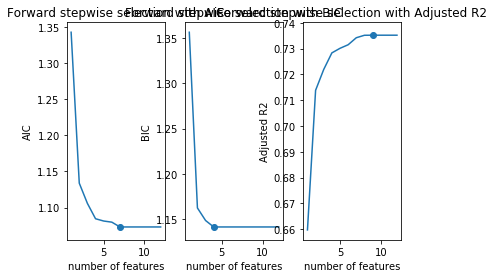

In [8]:
# Display the results
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(list_n_features, aic)
ax1.scatter(list_n_features[selected_nb_features_aic], aic[selected_nb_features_aic])
ax1.set_title('Forward stepwise selection with AIC')
ax1.set_ylabel('AIC')
ax1.set_xlabel('number of features')
ax2.plot(list_n_features, bic)
ax2.scatter(list_n_features[selected_nb_features_bic], bic[selected_nb_features_bic])
ax2.set_title('Forward stepwise selection with BIC')
ax2.set_ylabel('BIC')
ax2.set_xlabel('number of features')
ax3.plot(list_n_features, adj_r2)
ax3.scatter(list_n_features[selected_nb_features_r2], adj_r2[selected_nb_features_r2])
ax3.set_title('Forward stepwise selection with Adjusted R2')
ax3.set_ylabel('Adjusted R2')
ax3.set_xlabel('number of features')
plt.show()

As expected, BIC gives a lower number of features than AIC and Adjusted R2.